**Logistic regression**

Regression models are a class of statistical models that let you explore the relationship between a binary response variable and some explanatory variables. That is, given some explanatory variables, you can make predictions about the value of the response variable. 



Let's assume we count an outcome.

Licourice lovers:

Yes = 50

No = 75

$prob = \frac {50 }{100 }$ = 0.50 = 50%

$odds = \frac {50 }{75 }$ = 0.66 = 66%

We predict the probability of the outcome occuring from a logistic regression we do so in log odds:

It is just the log of odds:
$log \: odds = ln(0.66) = -0.41$



With this in mind,

Take a look at the formula for logistic regression.

$log(odds) [Y] = b_0 + b_1x_i + e_i$

or:

$ln(\frac {P(Y) }{1-P(Y) }) = b_0 + b_1x_i + e_i$


$b_1$ is still a change in the outcome from the unit change in the predictor, except now it is the log odds of the outcome occuring.

However, we can change this. We know that: 

$$ln(1) = 0$$

$$exp(0) = 1$$

Therefore,

$exp(b) = \frac {odds \: after \:a \:unit \:change\: in \:the \:predictor}{original\: odds} $

$exp(b_0)$, the odds of outcome when predictor is 0

$exp(b_1)$ = the odds ratio associated with a unit change in the predictor

Then, we can express outcomes in terms of odds/odds ratios, and not odd logs.

These are easier to interpret, that is:

OR > 1, when the predictor goes up, so does the probability of outcome  
OR < 1, predictor goes up, and the probability of the outcome goes down

OR > 1, percentage change = (OR -1) * 100

OR < 1, percentage change = 1/OR -1) * 100 


In logistic regression, our probabilities are not linear and therefore cannot be summarized in the two variables, slope and intercept, directly. 

But by taking the log odds we can transform our probabilities into a linear format. This makes for great modelling, but poor interpretation. 

Log odds, what are they really? No one will compare log odds. Report the odds, instead.



**Assumptions:**

The model does not need to fulfill the assumption of linearity, normality and homoscendastity (conditions needed to be met to run a 'typical' linear regression).

**Example:**

Research has shown that we are better able to remember information that we are curious about. Here, we want to test/replicate these findings.

So, we randomly sample 200 people by giving them each a trivia question and ask them if they are curious about the answer. We record their answer as "curious" or "not curious" Then, we give them the answer.

Later, we ask them: "Do you remember what the answer is?" If they correctly remember we record this as "remembering", else we record this as "forget". Below is a table of the data.

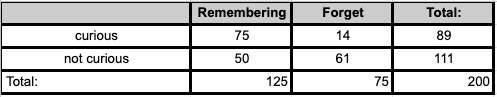

$$Odds_{remembering}:  \frac {number  \: of \: remembering}{forget}$$

$$Odds_{remembering} = \frac {125}{75}= 1.67$$

$$Odds_{remembering\:after \:curious}: \frac {remembering \:after\: curious}{forgetting \:after\: curious}$$

$$Odds_{remembering\:after \:curious}= \frac {75}{14}= 5.36$$

$$Odds_{remembering\:after\:not \:curious}: \frac {remembering \:after\:not \: curious}{forgetting \:after\: not \:curious}$$

$$Odds_{remembering\:after\:not \:curious} = \frac {50}{61}= 0.82$$

Finally, The (regression) test compares things, to see if there is a difference (odds). Regression measures this difference through the rate of change (odds ratio) by jumping from not curious to curious.

$$Odds_{ratio} = \frac {Odds  \: remembering \: after \: curious}{Odds  \: remembering \: after \: not \:curious}$$

$$Odds_{ratio} = \frac {5.36}{0.82}= 6.54$$

So the odds of remembering after being curious is 6.54 higher than the odds of remembering when not curious.



In [65]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf


df = pd.read_csv("/log_curious.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   curious      200 non-null    int64
 1   remembering  200 non-null    int64
 2   mood         200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [66]:
#The interpretation is valid, but log odds is not intuitive in it's interpretation. 

log_odds_reg = smf.logit("remembering ~ C(curious)",
        data = df).fit()

log_odds_reg.summary()




Optimization terminated successfully.
         Current function value: 0.575618
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            remembering   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Tue, 08 Nov 2022   Pseudo R-squ.:                  0.1299
Time:                        07:57:28   Log-Likelihood:                -115.12
converged:                       True   LL-Null:                       -132.31
Covariance Type:            nonrobust   LLR p-value:                 4.538e-09
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1989      0.191     -1.042      0.297      -0.573       0.175
C(curious)[T.1]     1.8773      0.348      5.393      0.000       1.195       2.559
===================================================================================
"""

In [12]:
print(log_odds_reg.params)

Intercept         -0.198851
C(curious)[T.1]    1.877282
dtype: float64


**How do we interpret these log odd ratios? Its hard.**

But we can convert these $b_0$ and $b_1$ our log odds to odd ratios by using the $exp(b_0)$ and $exp(b_1)$

In [67]:

#Let's convert this to odds ratio and interpret the model again. 
#remember the equation above:
#To convert the log odds coefficients and confidence intervals, one needs to take the exponential of the values.


model_odds_ratio = pd.DataFrame(np.exp(log_odds_reg.params), columns= ['OR'])
model_odds_ratio['z-value']= log_odds_reg.tvalues
model_odds_ratio['p-values']=log_odds_reg.pvalues
model_odds_ratio[['2.5%', '97.5%']] = np.exp(log_odds_reg.conf_int())

model_odds_ratio

,OR,z-value,p-values,2.5%,97.5%
Intercept,0.819672,-1.042356,2.972468e-01,0.563970,1.191309
C(curious)[T.1],6.535714,5.393344,6.915828e-08,3.303788,12.929269


To remember our math above, we could say that the odds of remembering after being curious are 6.54 higher than the odds of remembering after not being curious.

**Example:**

Now researchers never finish asking questions. So while we found support for curiosity impacting memory, we start to wonder what it is about curiosity that has that effect. 

**Curiosity:**  the differences in remembering are simply due to underlying differences in curiosity.
 
**Mood:** people with different curiosity have different moods (they are happier when curious), and that the differences between the curiosity only appear as a consequence of already being in good mood and not due to any difference in curiosity. 

**Curiosity & Mood:** Both curiosity and mood play a role in influencing our dependent variable, remembering. 

To answer this question, we collect some more data. Specifically we ask people to rate their mood when they are about to get a trivia answer on a likert scale from 1-7. 

In [68]:
 

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf


df1 = pd.read_csv("/log_curious.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   curious      200 non-null    int64
 1   remembering  200 non-null    int64
 2   mood         200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [69]:
!pip install -q researchpy

In [70]:
import researchpy as rp

In [34]:
rp.summary_cont(df1[['mood']])


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,mood,200.0,3.735,2.2293,0.1576,3.4242,4.0458


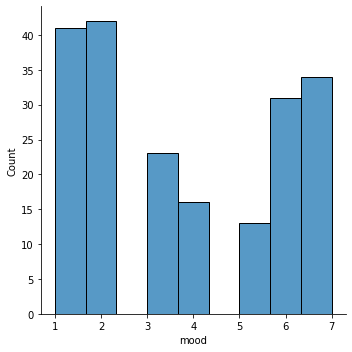

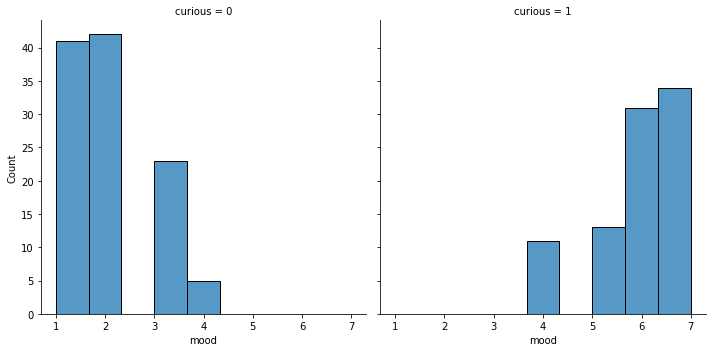

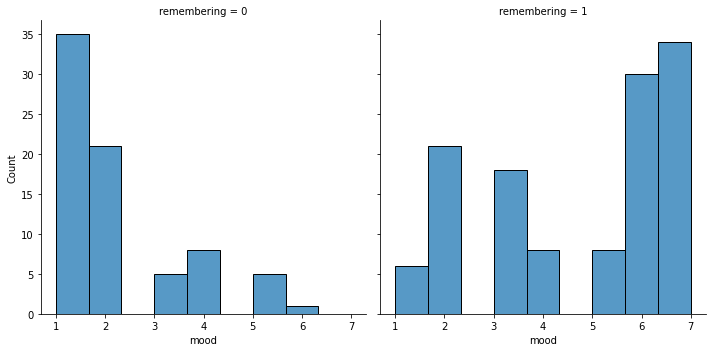

In [73]:
# Create the histograms of curiosity split by remember
import seaborn as sns
import matplotlib.pyplot as plt 
sns.displot(data = df1, x = 'mood')
sns.displot(data = df1, x = 'mood', col = 'curious')
sns.displot(data = df1, x = 'mood', col = 'remembering')

plt.show()

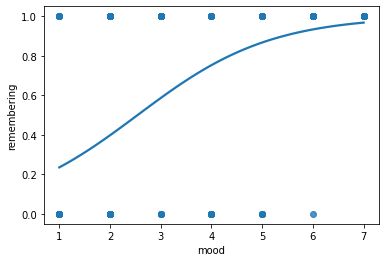

In [54]:
model= sns.regplot(x ="mood", y='remembering', data = df1, ci = None, logistic = True)



In [72]:
log_mood = smf.logit("remembering ~ mood",
        data = df1).fit()

log_mood.summary()


Optimization terminated successfully.
         Current function value: 0.463371
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            remembering   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Tue, 08 Nov 2022   Pseudo R-squ.:                  0.2996
Time:                        08:00:32   Log-Likelihood:                -92.674
converged:                       True   LL-Null:                       -132.31
Covariance Type:            nonrobust   LLR p-value:                 5.399e-19
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9416      0.353     -5.507      0.000      -2.633      -1.251
mood           0.7635      0.112      6.842      0.000       0.545       0.982
==============================================================================
"""

In [61]:

#Let's convert this to odds ratio and interpret the model again. 
#remember the equation above:
#To convert the log odds coefficients and confidence intervals, one needs to take the exponential of the values.


odds_ratio_mood = pd.DataFrame(np.exp(log_mood.params), columns= ['OR'])
odds_ratio_mood['z-value']= log_mood.tvalues
odds_ratio_mood['p-values']=log_mood.pvalues
odds_ratio_mood[['2.5%', '97.5%']] = np.exp(log_mood.conf_int())

odds_ratio_mood

,OR,z-value,p-values,2.5%,97.5%
Intercept,0.143473,-5.507143,3.647040e-08,0.071890,0.286333
mood,2.145823,6.841965,7.811418e-12,1.724268,2.670441


In [78]:
from statsmodels.formula.api import logit
log_cur_mood = logit('remembering ~ mood + curious', data = df1).fit()
log_cur_mood.summary()


Optimization terminated successfully.
         Current function value: 0.396307
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            remembering   No. Observations:                  200
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                            2
Date:                Tue, 08 Nov 2022   Pseudo R-squ.:                  0.4010
Time:                        08:39:18   Log-Likelihood:                -79.261
converged:                       True   LL-Null:                       -132.31
Covariance Type:            nonrobust   LLR p-value:                 9.122e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6908      0.570     -6.471      0.000      -4.809      -2.573
mood           1.8070      0.271      6.666      0.000       1.276       2.338
curious       -4.4580      0.956     -4.663      0.000      -6.332      -2.584
==============================================================================
"""

In [74]:
print(log_interaction.params)

Intercept   -3.690802
mood         1.807007
curious     -4.458031
dtype: float64


In [79]:
odds_ratio_cur_mood = pd.DataFrame(np.exp(log_cur_mood.params), columns= ['OR'])
odds_ratio_cur_mood

,OR
Intercept,0.024952
mood,6.092186
curious,0.011585


In [83]:
from statsmodels.formula.api import logit
log_cur_mood_interaction = logit('remembering ~ mood + curious + mood:curious', data = df1).fit()
log_cur_mood_interaction.summary()



Optimization terminated successfully.
         Current function value: 0.393584
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            remembering   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Tue, 08 Nov 2022   Pseudo R-squ.:                  0.4051
Time:                        11:01:09   Log-Likelihood:                -78.717
converged:                       True   LL-Null:                       -132.31
Covariance Type:            nonrobust   LLR p-value:                 4.412e-23
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.2874      0.662     -4.962      0.000      -4.586      -1.989
mood             1.5968      0.324      4.926      0.000       0.961       2.232
curious         -6.8629      2.670     -2.571      0.010     -12.095      -1.631
mood:curious     0.6101      0.608      1.004      0.315      -0.581       1.802
================================================================================
"""

In [82]:
odds_ratio_cur_mood_interaction = pd.DataFrame(np.exp(log_cur_mood_interaction.params), columns= ['OR'])
odds_ratio_cur_mood_interaction['p-values']=log_cur_mood_interaction.pvalues
odds_ratio_cur_mood_interaction

,OR,p-values
Intercept,0.037351,6.964449e-07
mood,4.937400,8.411685e-07
curious,0.001046,1.014714e-02
mood:curious,1.840704,3.154905e-01


So what are we making of these findings.

It seems that the difference in memory is largely determined by a difference in mood, moreso than curiosity.

**So how can we interpret this?**

Because the original relationship between the independent (curiosity) and dependent (remembering) variable became **much weaker** when the intervening variable (mood) was controlled for (added to the model)
, we could conclude that (1) the control variable really was an intervening variable that **helped to explain the link** between the independent and dependent variables. 

Alternatively, we could conclude that (2) the control variable (mood) is a potential confounding variable, one that is producing a "fake" association between the independent and dependent variables. 

In such a situation, if the original relationship disappears when the control is applied, then we would conclude that the original relationship was non-existent, and it was really all about 'mood'. 

It is a matter of interpreting the results, and requires us to reflect on how the variables might affect each other.

In the last model, we add an interaction term. This is a way to see if when we combine the effect of curiosty and mood, we get a stronger effect. This does not seem to be the case. 